In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Displaying the first few rows of each dataset
print("Customers Dataset:")
display(customers.head())

print("Products Dataset:")
display(products.head())

print("Transactions Dataset:")
display(transactions.head())

Customers Dataset:


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


Products Dataset:


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


Transactions Dataset:


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [3]:
# Checking for null values
print("Null Values:")
print("Customers:", customers.isnull().sum())
print("Products:", products.isnull().sum())
print("Transactions:", transactions.isnull().sum())

# Checking for duplicates
print("Duplicates:")
print("Customers:", customers.duplicated().sum())
print("Products:", products.duplicated().sum())
print("Transactions:", transactions.duplicated().sum())

# Dropping duplicates if found
customers = customers.drop_duplicates()
products = products.drop_duplicates()
transactions = transactions.drop_duplicates()

Null Values:
Customers: CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products: ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions: TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
Duplicates:
Customers: 0
Products: 0
Transactions: 0


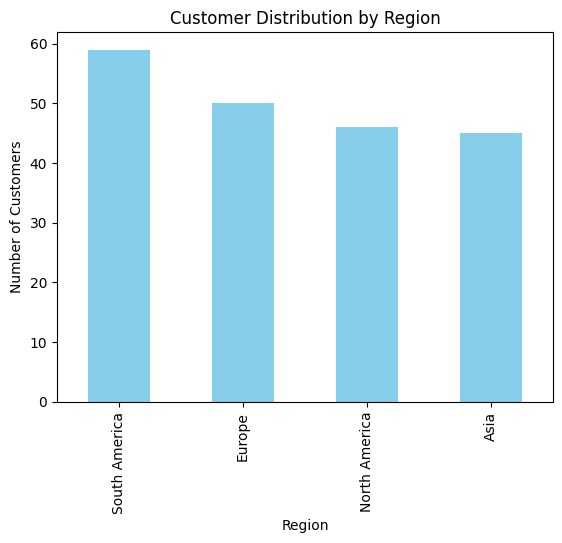

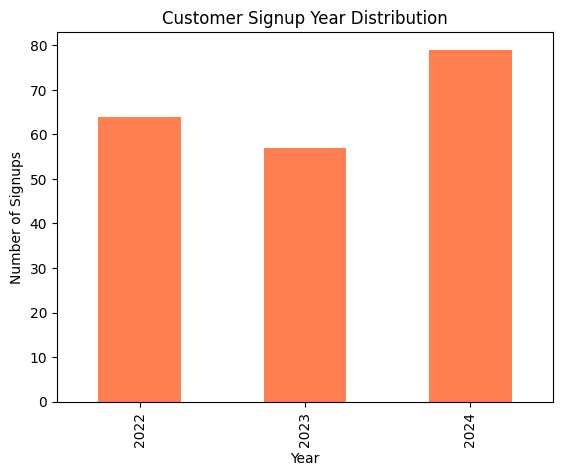

In [4]:
# Checking customer distribution by region
region_counts = customers['Region'].value_counts()
region_counts.plot(kind='bar', title='Customer Distribution by Region', color='skyblue')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

# Signup date analysis
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
signup_counts = customers['SignupDate'].dt.year.value_counts().sort_index()
signup_counts.plot(kind='bar', title='Customer Signup Year Distribution', color='coral')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.show()

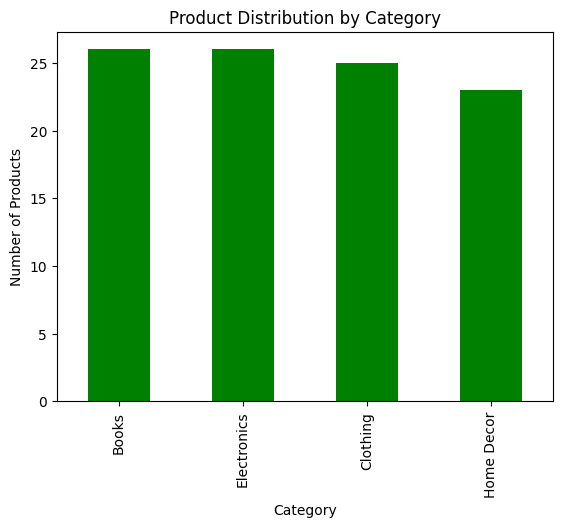

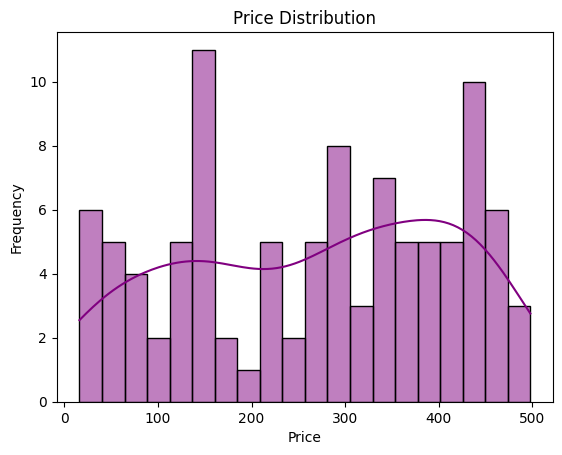

In [5]:
# Checking product distribution by category
category_counts = products['Category'].value_counts()
category_counts.plot(kind='bar', title='Product Distribution by Category', color='green')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.show()

# Price analysis
sns.histplot(products['Price'], bins=20, kde=True, color='purple')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

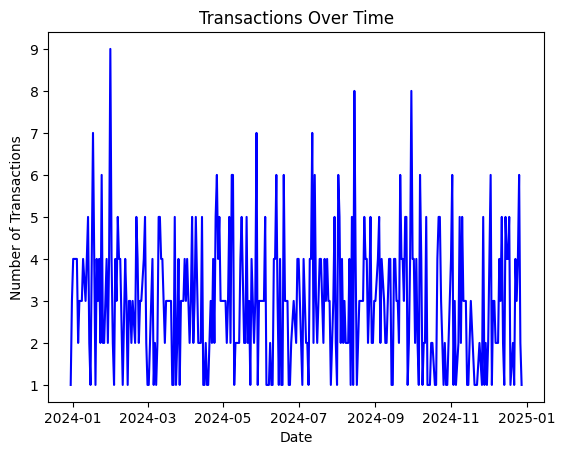

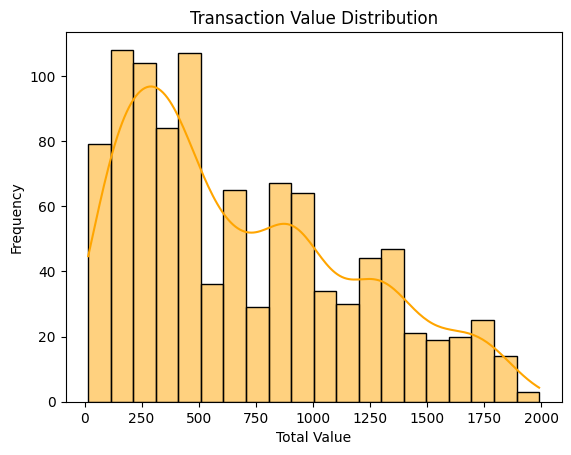

In [6]:
# Checking transaction distribution by date
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transaction_counts = transactions['TransactionDate'].dt.date.value_counts().sort_index()
transaction_counts.plot(title='Transactions Over Time', color='blue')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()

# Analyzing total transaction values
sns.histplot(transactions['TotalValue'], bins=20, kde=True, color='orange')
plt.title('Transaction Value Distribution')
plt.xlabel('Total Value')
plt.ylabel('Frequency')
plt.show()

In [7]:
# Merging datasets
merged_data = pd.merge(transactions, customers, on='CustomerID')
merged_data = pd.merge(merged_data, products, on='ProductID')

# Checking top customers by transaction value
top_customers = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
print("Top 10 Customers by Total Transaction Value:")
print(top_customers)

# Checking top products by quantity sold
top_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top 10 Products by Quantity Sold:")
print(top_products)

Top 10 Customers by Total Transaction Value:
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64
Top 10 Products by Quantity Sold:
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64
